## Comparative Analysis

Guidance:

Compare and contrast different subsets of your data. This can include comparisons over time, across different categories, or any other relevant segmentation.  Note that for some projects, the nature of this comparative analysis will be obvious.  For others, you will need to think about how you might subset your data.

Discuss any notable similarities or differences you have identified.


In [ ]:
data.columns

Index(['year', 'nta_name', 'borough', 'pct_attendance',
       'pct_chronically_absent', 'num_evictions', 'median_sale_price', 'hvi',
       'total_population', 'median_income', 'white_pct', 'black_pct',
       'american_indian_alaska_native_pct', 'asian_pct',
       'hawaiian_pacific_islander_pct', 'multiple_race_pct', 'other_race_pct',
       'income_category', 'minority_pct', 'minority_dominated'],
      dtype='object')

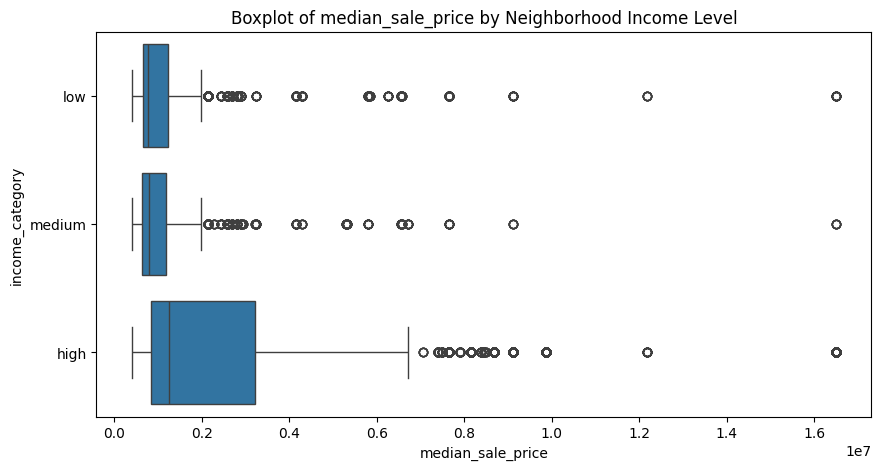

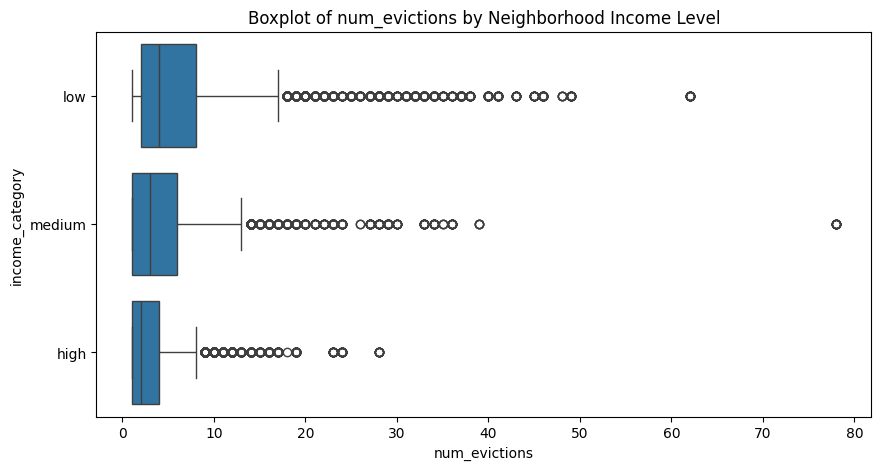

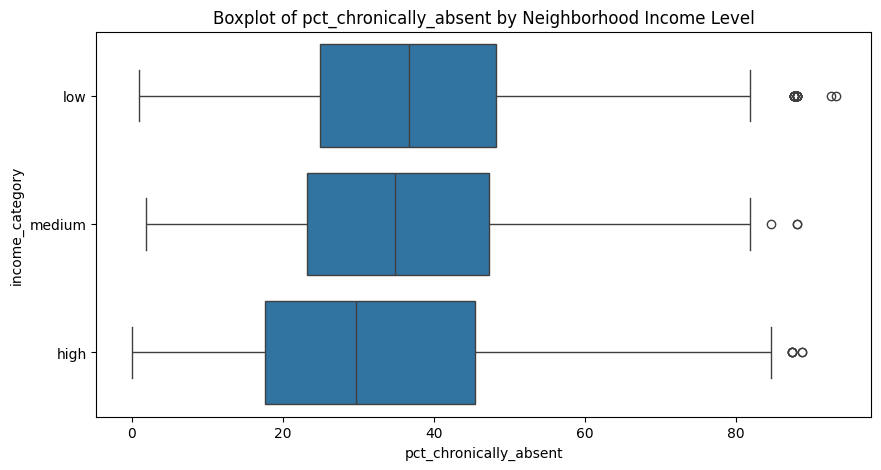

In [ ]:
# 1. Reproduced: boxplots of each feature (median housing prices, eviction rates, and school attendance)
# by neighborhood income category
features = ['median_sale_price', 'num_evictions', 'pct_chronically_absent']
for i, feature in enumerate(features):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x=feature, y='income_category')
    plt.title(f"Boxplot of {feature} by Neighborhood Income Level")
plt.show()

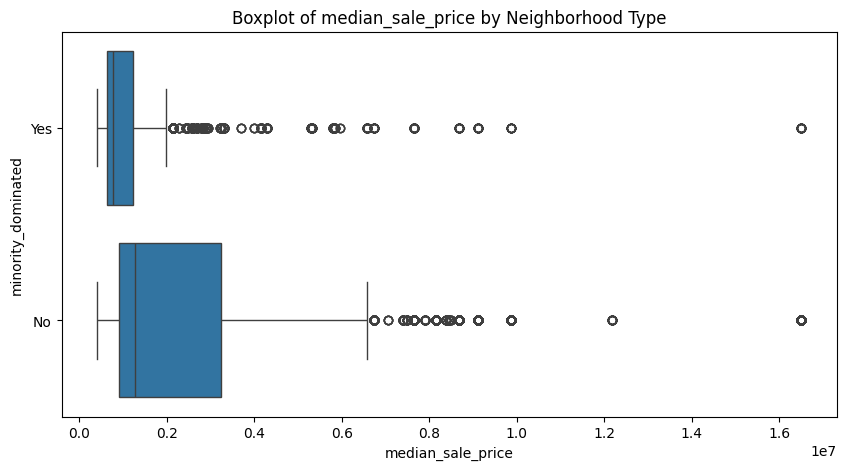

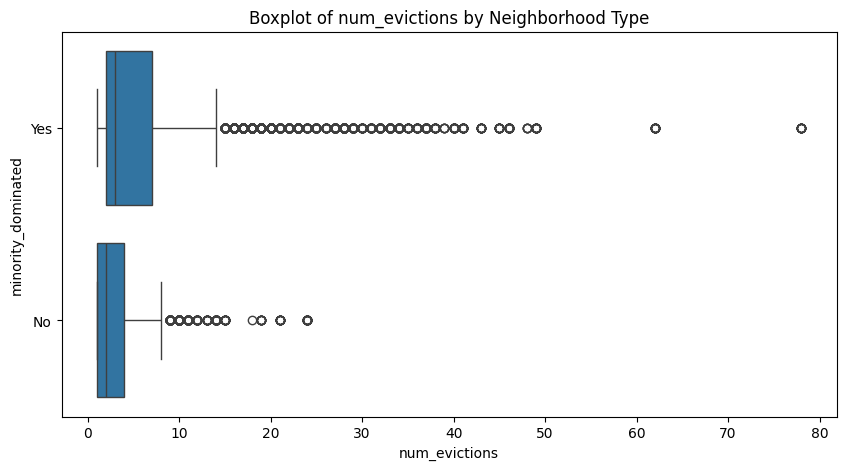

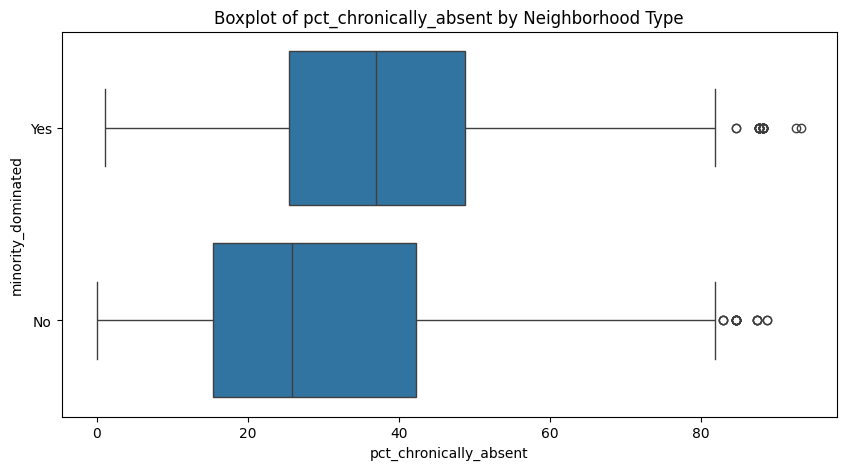

In [ ]:
# 2. Reproduced: boxplots of each feature (median housing prices, eviction rates, and school attendance)
# by neighborhood racial category
for i, feature in enumerate(features):
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data, x=feature, y='minority_dominated')
    plt.title(f"Boxplot of {feature} by Neighborhood Type")
plt.show()

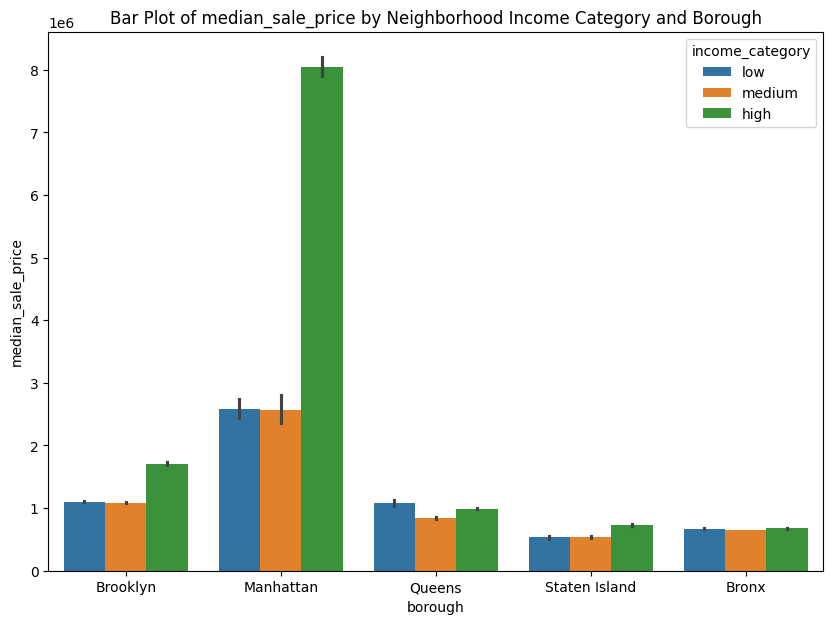

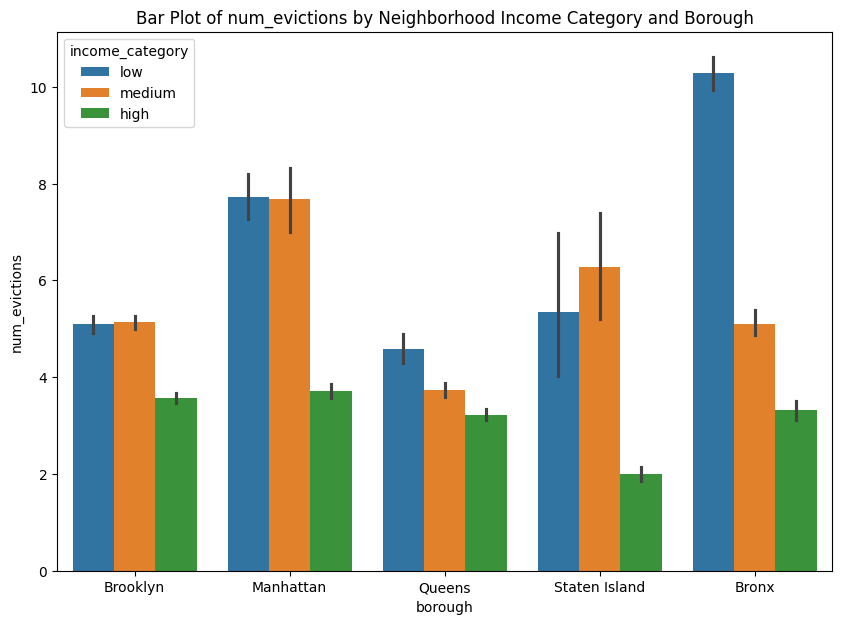

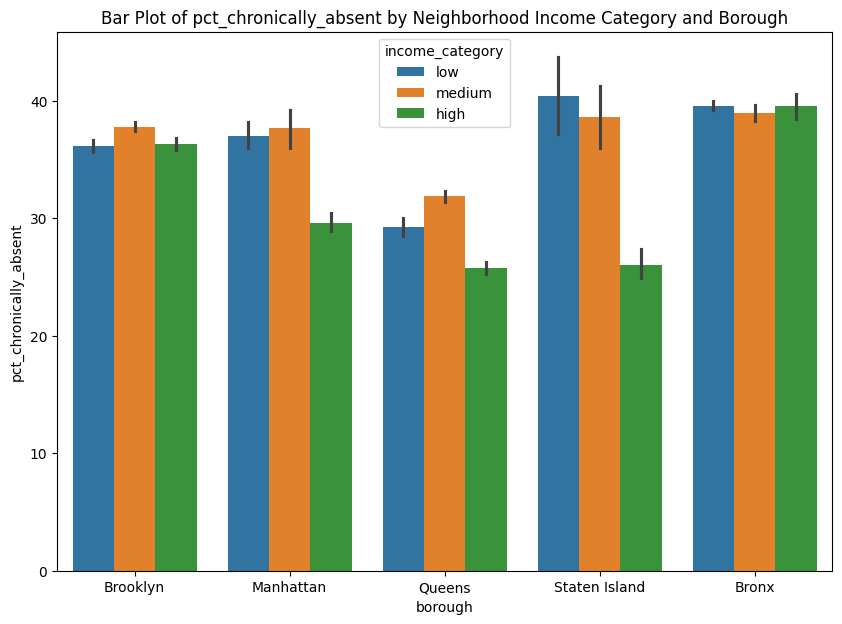

In [ ]:
# Features by borough and income category
for i, feature in enumerate(features):
    plt.figure(figsize=(10, 7))
    sns.barplot(data=data, x='borough', y=feature, hue='income_category')
    plt.title(f"Bar Plot of {feature} by Neighborhood Income Category and Borough")
plt.show()

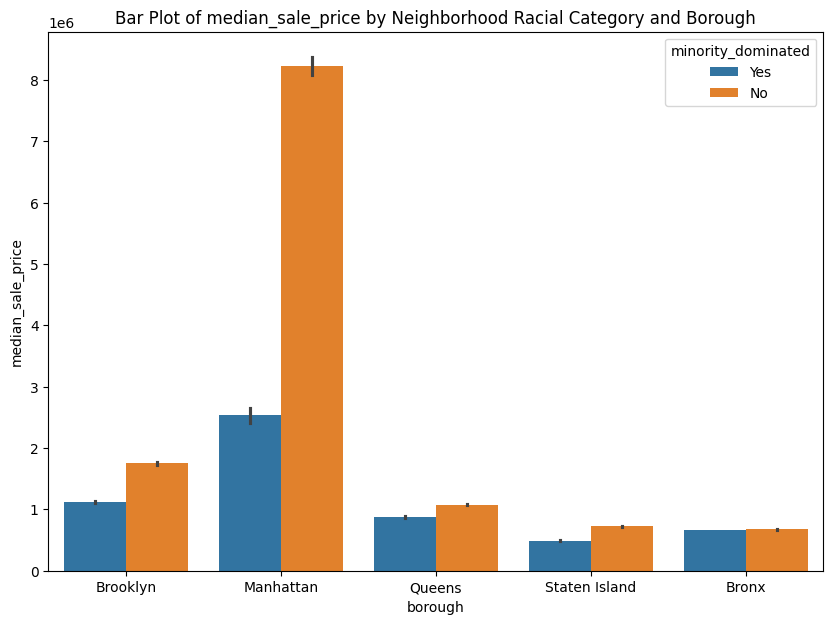

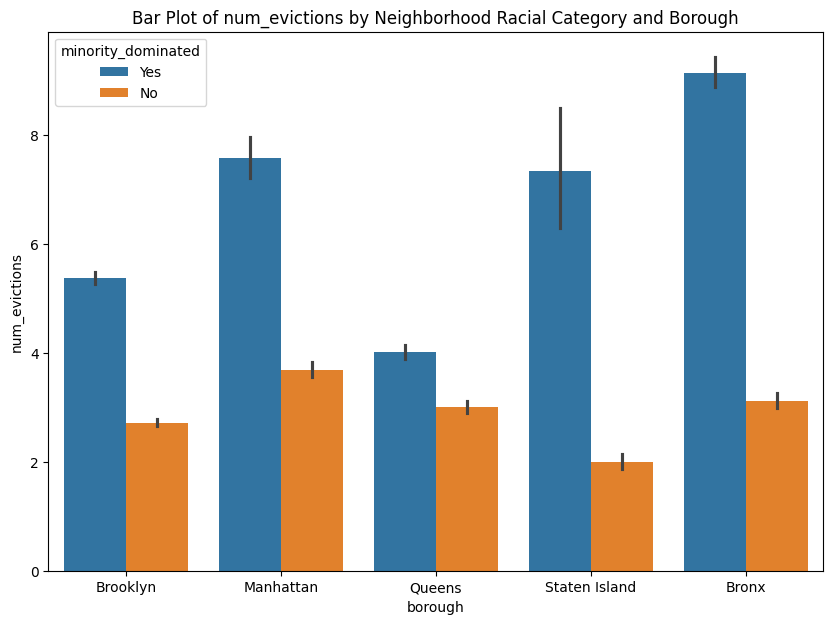

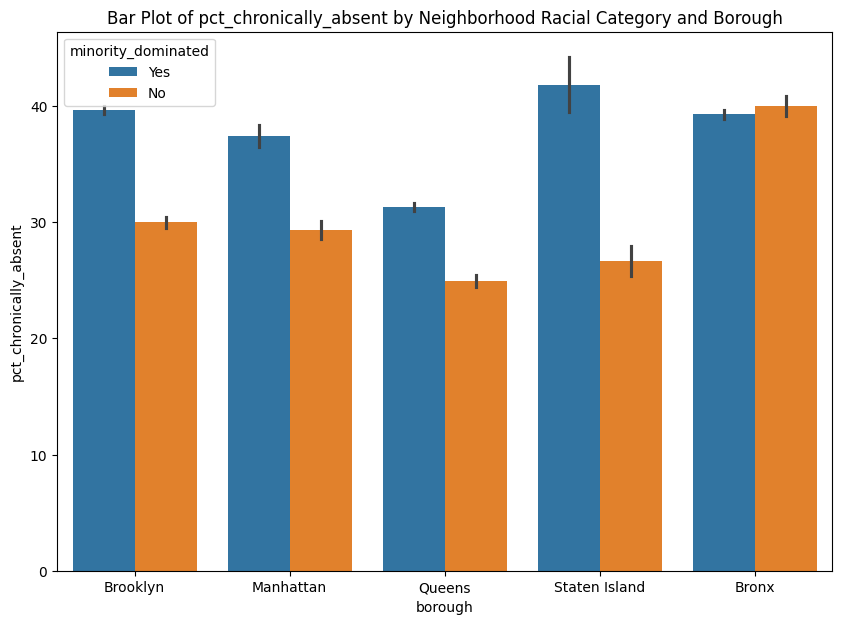

In [ ]:
# 3. Features by borough and neighborhood racial category
for i, feature in enumerate(features):
    plt.figure(figsize=(10, 7))
    sns.barplot(data=data, x='borough', y=feature, hue='minority_dominated')
    plt.title(f"Bar Plot of {feature} by Neighborhood Racial Category and Borough")
plt.show()

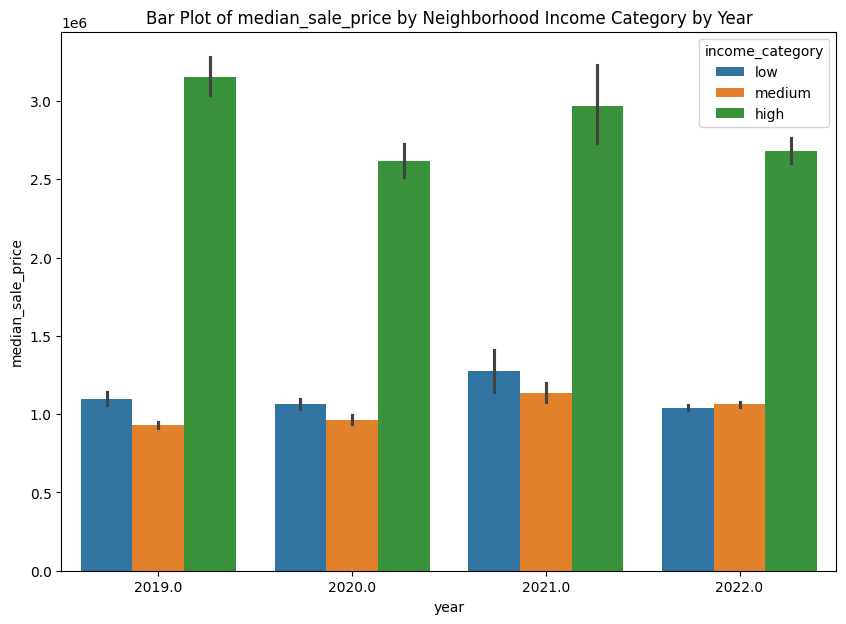

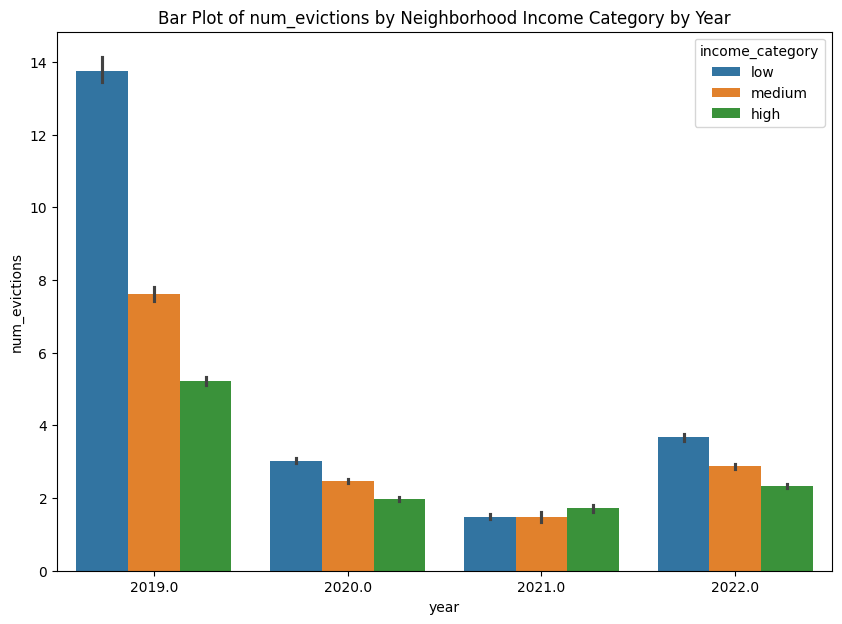

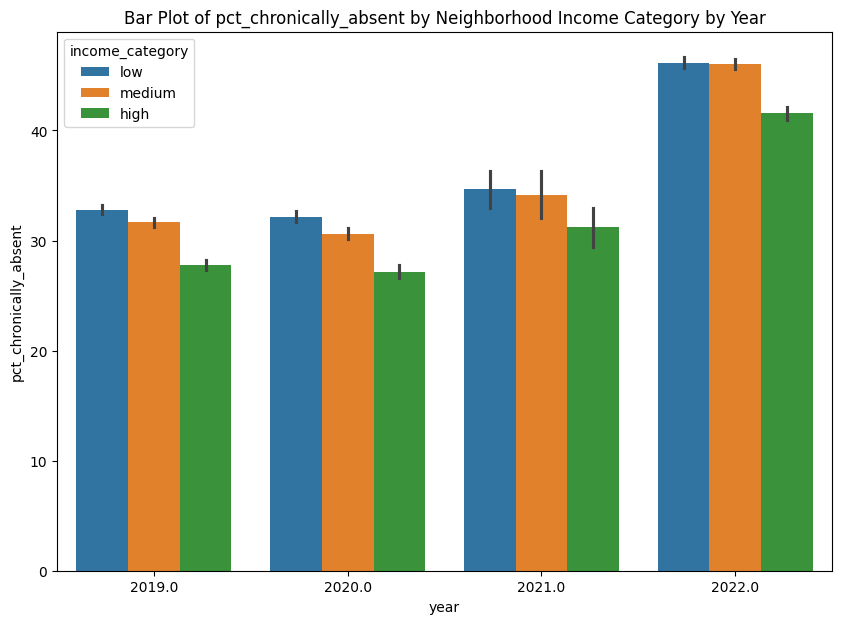

In [ ]:
# Features by year and income category
for i, feature in enumerate(features):
    plt.figure(figsize=(10, 7))
    sns.barplot(data=data, x='year', y=feature, hue='income_category')
    plt.title(f"Bar Plot of {feature} by Neighborhood Income Category by Year")
plt.show()

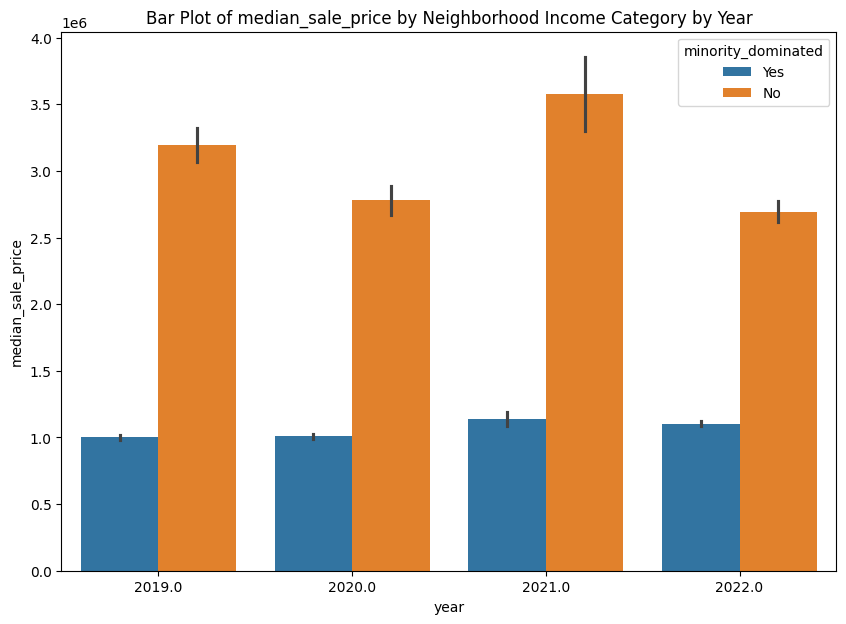

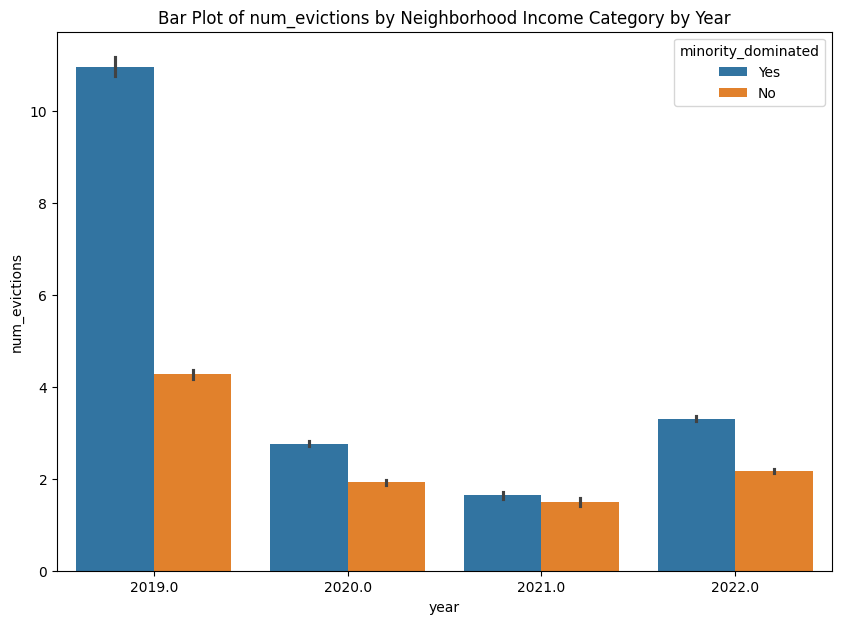

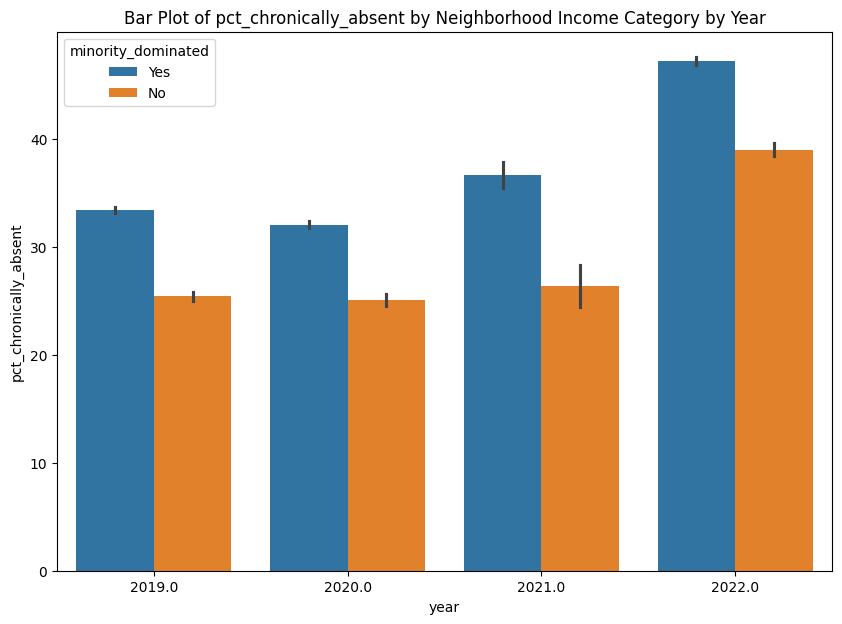

In [ ]:
# Features by year and neighborhood racial category
for i, feature in enumerate(features):
    plt.figure(figsize=(10, 7))
    sns.barplot(data=data, x='year', y=feature, hue='minority_dominated')
    plt.title(f"Bar Plot of {feature} by Neighborhood Income Category by Year")
plt.show()

## Comparative Analysis

Guidance:

Compare and contrast different subsets of your data. This can include comparisons over time, across different categories, or any other relevant segmentation.  Note that for some projects, the nature of this comparative analysis will be obvious.  For others, you will need to think about how you might subset your data.

Discuss any notable similarities or differences you have identified.


In [ ]:
data.columns

Index(['year', 'nta_name', 'borough', 'pct_attendance',
       'pct_chronically_absent', 'num_evictions', 'median_sale_price', 'hvi',
       'total_population', 'median_income', 'white_pct', 'black_pct',
       'american_indian_alaska_native_pct', 'asian_pct',
       'hawaiian_pacific_islander_pct', 'multiple_race_pct', 'other_race_pct',
       'income_category', 'minority_pct', 'minority_dominated'],
      dtype='object')

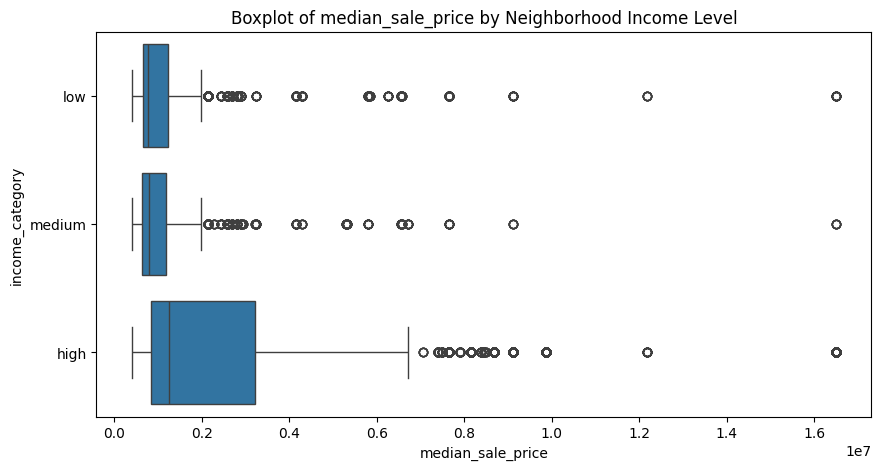

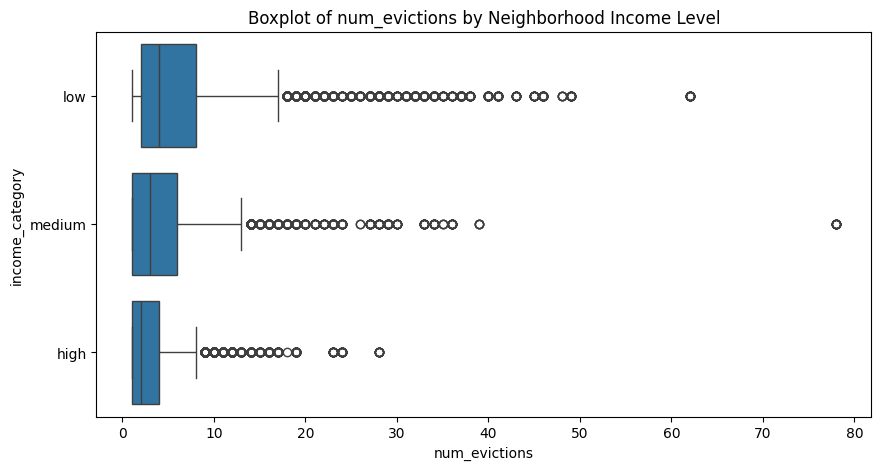

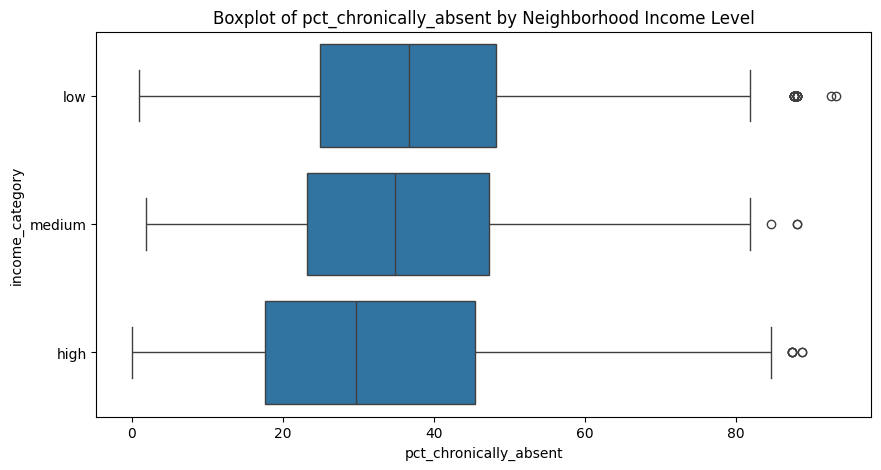

In [ ]:
# 1. Reproduced: boxplots of each feature (median housing prices, eviction rates, and school attendance)
# by neighborhood income category
features = ['median_sale_price', 'num_evictions', 'pct_chronically_absent']
for i, feature in enumerate(features):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x=feature, y='income_category')
    plt.title(f"Boxplot of {feature} by Neighborhood Income Level")
plt.show()

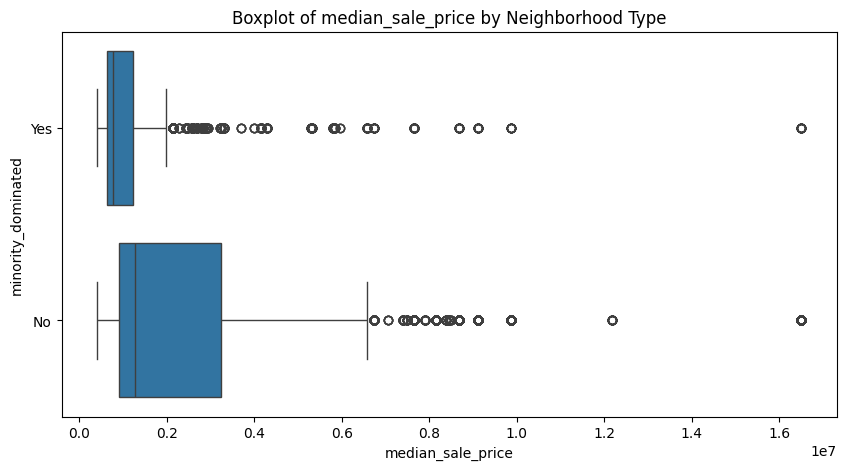

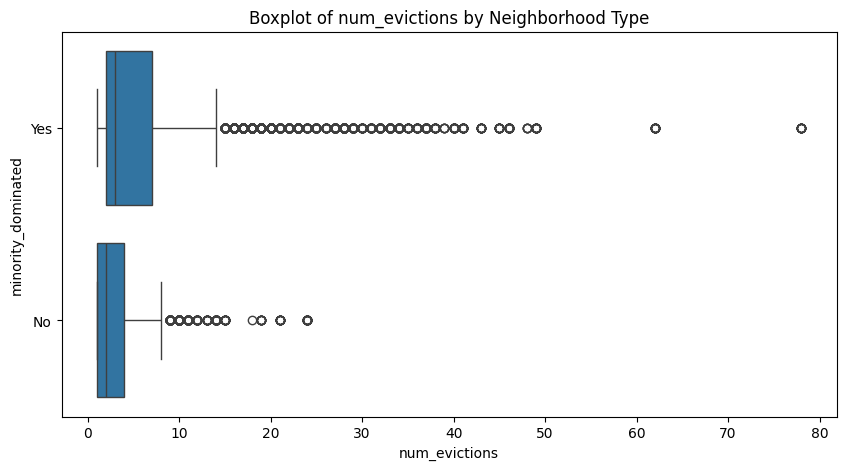

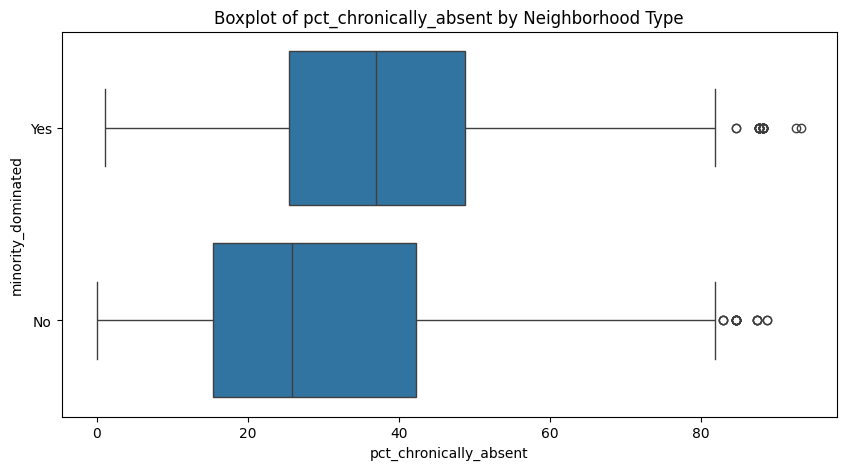

In [ ]:
# 2. Reproduced: boxplots of each feature (median housing prices, eviction rates, and school attendance)
# by neighborhood racial category
for i, feature in enumerate(features):
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data, x=feature, y='minority_dominated')
    plt.title(f"Boxplot of {feature} by Neighborhood Type")
plt.show()

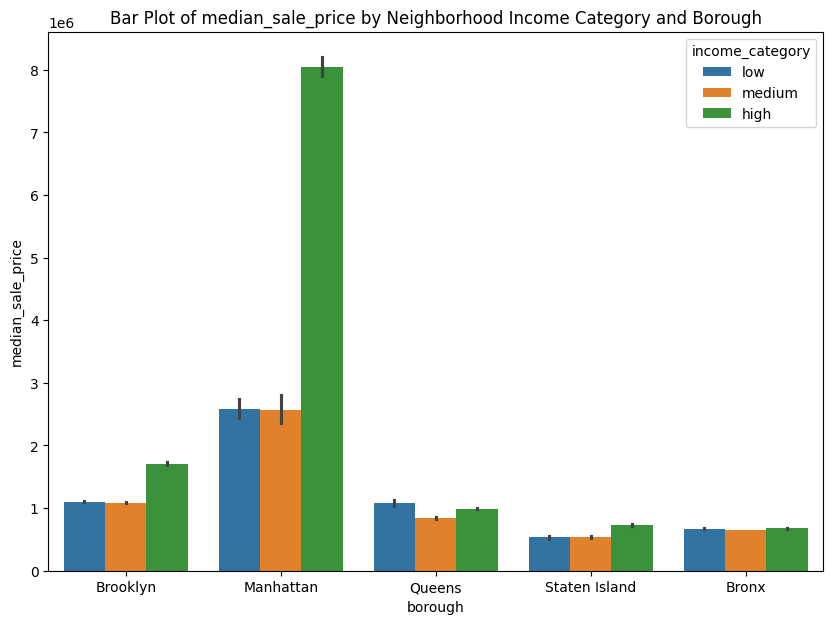

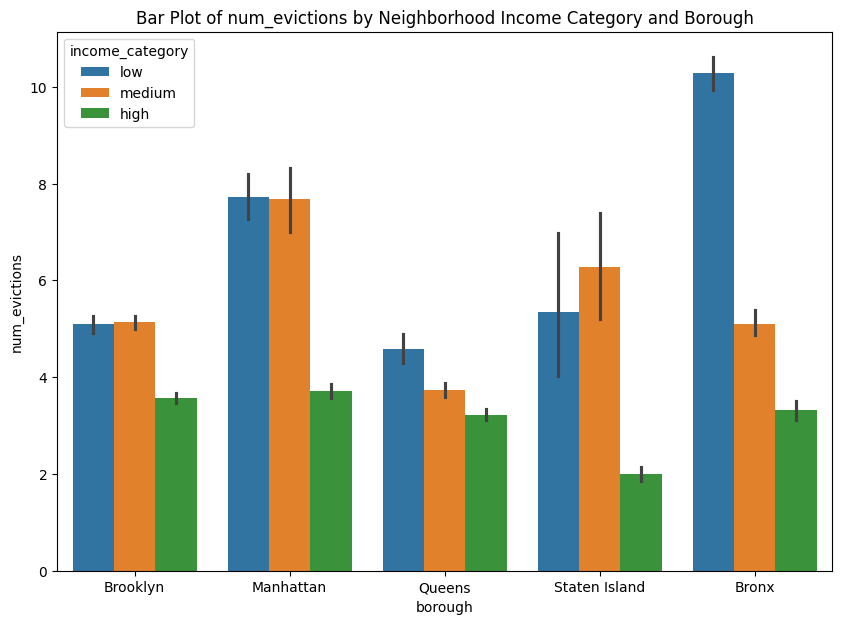

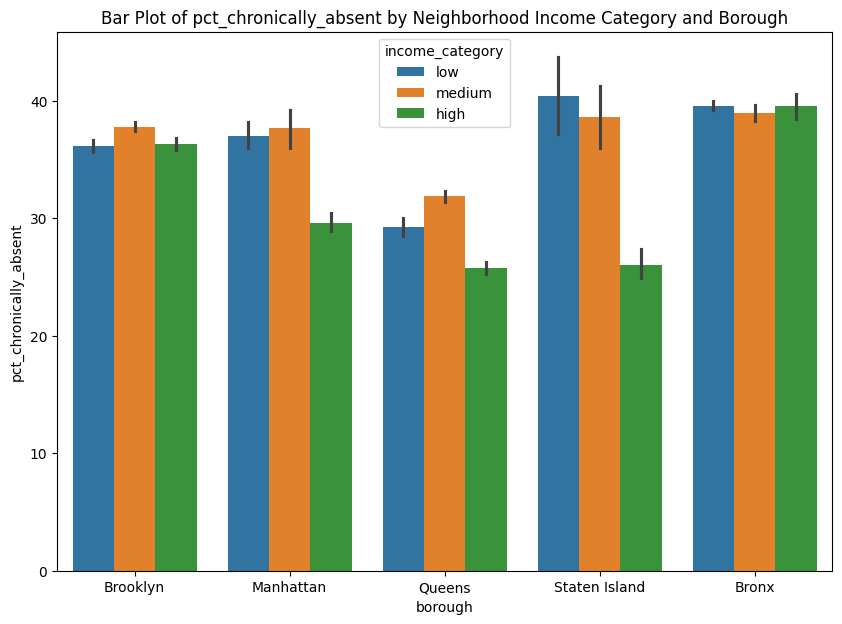

In [ ]:
# Features by borough and income category
for i, feature in enumerate(features):
    plt.figure(figsize=(10, 7))
    sns.barplot(data=data, x='borough', y=feature, hue='income_category')
    plt.title(f"Bar Plot of {feature} by Neighborhood Income Category and Borough")
plt.show()

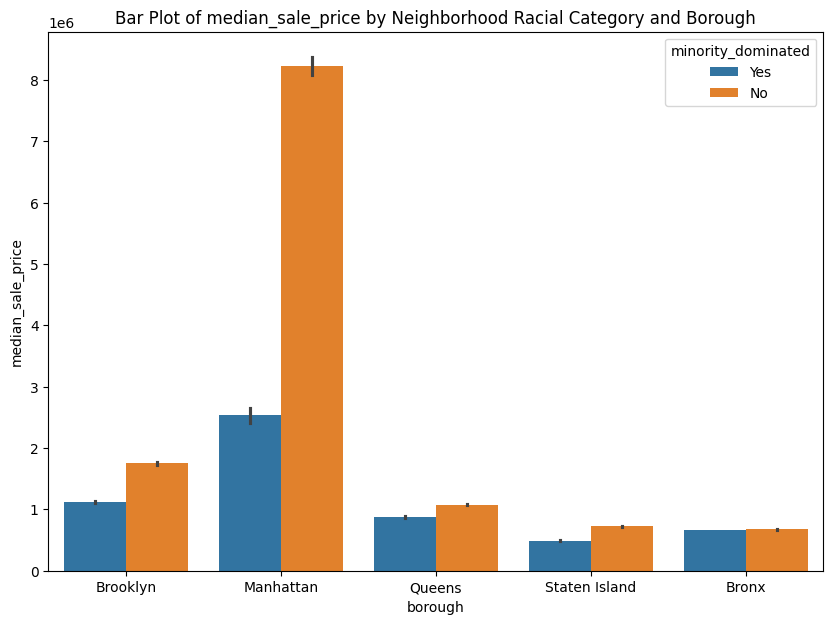

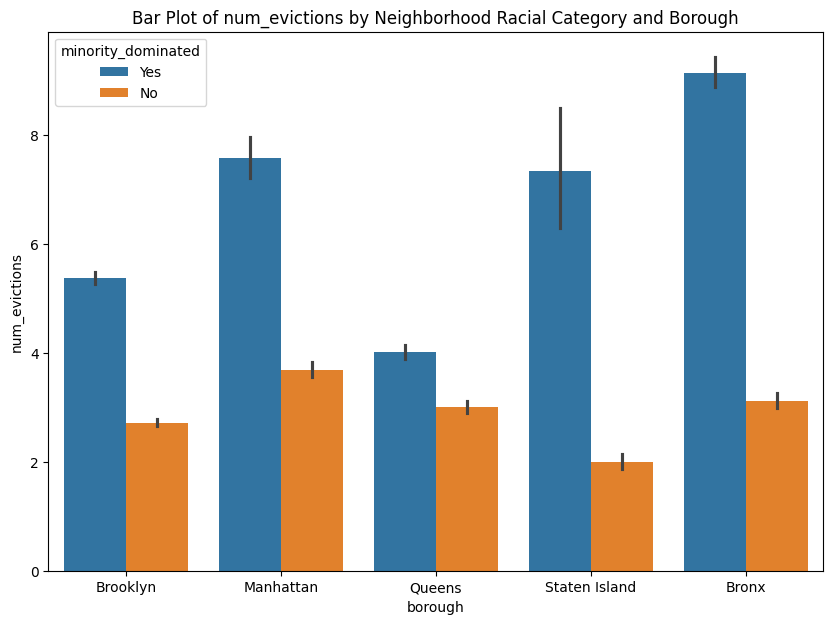

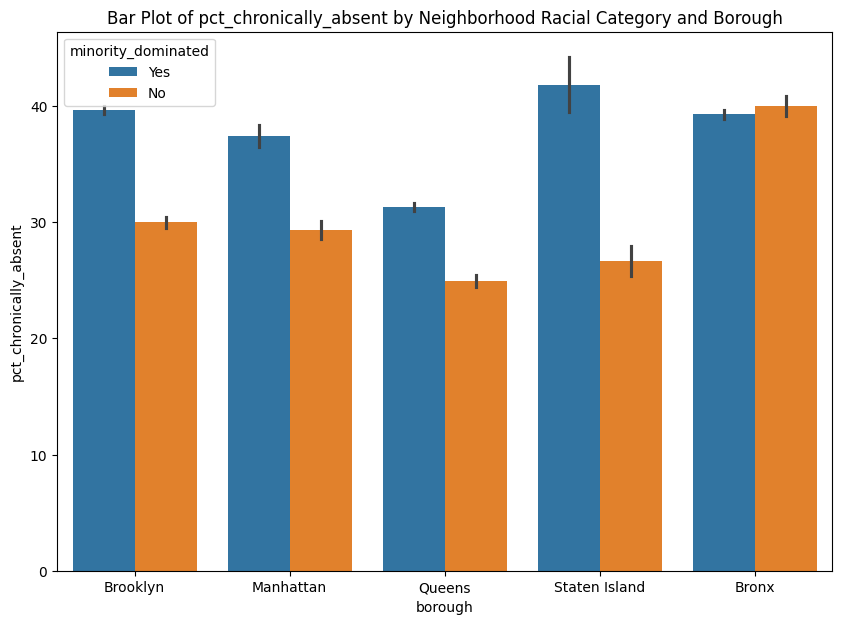

In [ ]:
# 3. Features by borough and neighborhood racial category
for i, feature in enumerate(features):
    plt.figure(figsize=(10, 7))
    sns.barplot(data=data, x='borough', y=feature, hue='minority_dominated')
    plt.title(f"Bar Plot of {feature} by Neighborhood Racial Category and Borough")
plt.show()

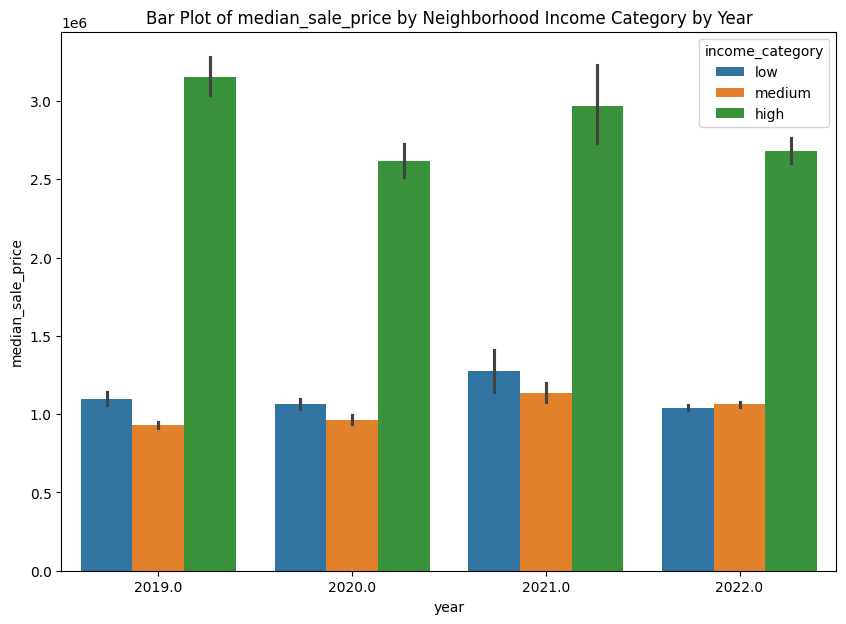

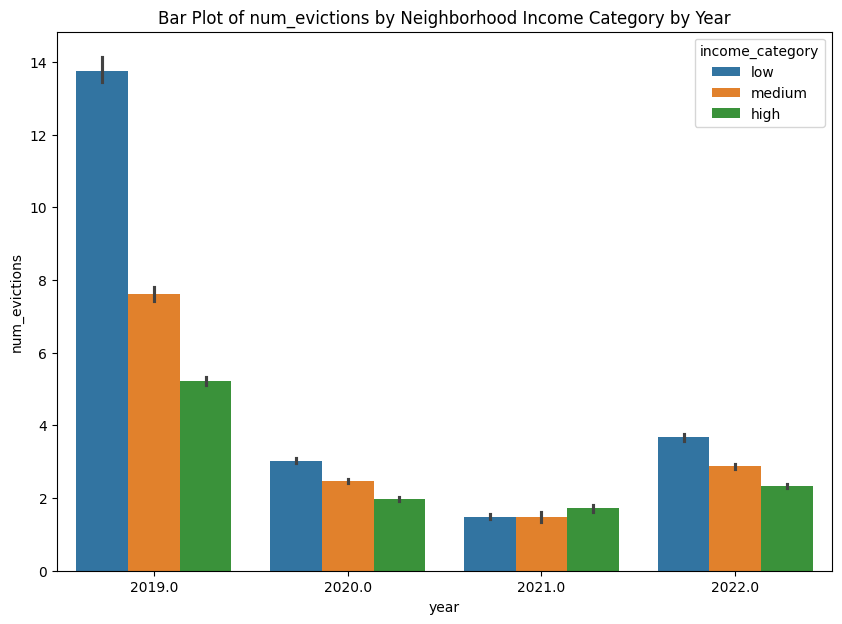

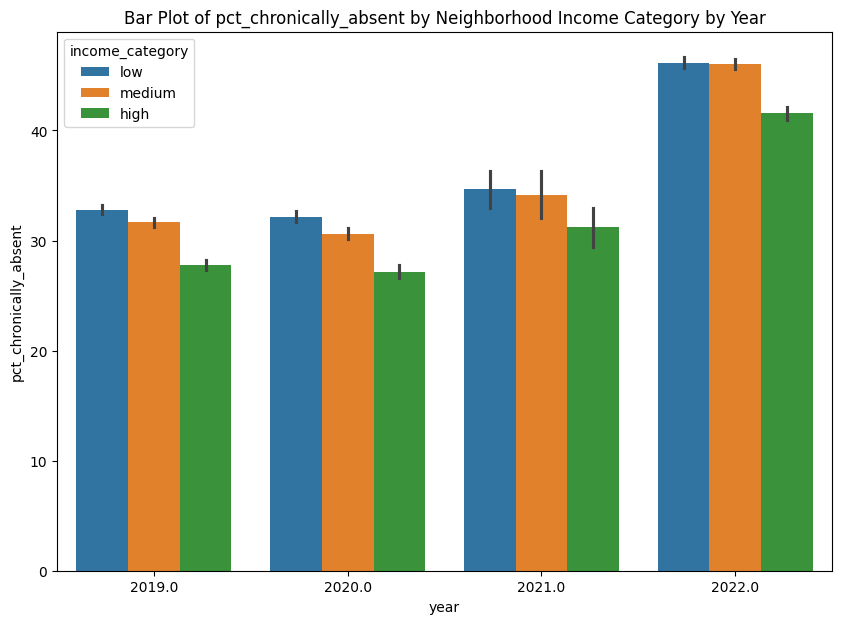

In [ ]:
# Features by year and income category
for i, feature in enumerate(features):
    plt.figure(figsize=(10, 7))
    sns.barplot(data=data, x='year', y=feature, hue='income_category')
    plt.title(f"Bar Plot of {feature} by Neighborhood Income Category by Year")
plt.show()

## Multivariate Analysis

Objective: To investigate the multivariate relationships between income, race/ethnicity and school attendance in NYC neighborhoods

In [ ]:
# Cross-tabulation
# Create a cross-tabulation of neighborhood income category and racial category
crossTab = pd.crosstab(data['income_category'], data['minority_dominated'])
crossTab

minority_dominated,No,Yes
income_category,,
low,1070,10823
medium,2236,9960
high,7928,3919


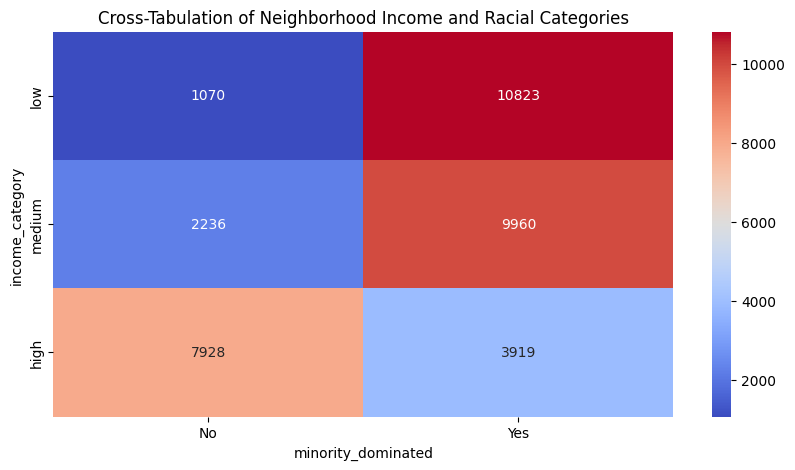

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(crossTab, annot=True, cmap='coolwarm', fmt='d')
plt.title("Cross-Tabulation of Neighborhood Income and Racial Categories")
plt.show()


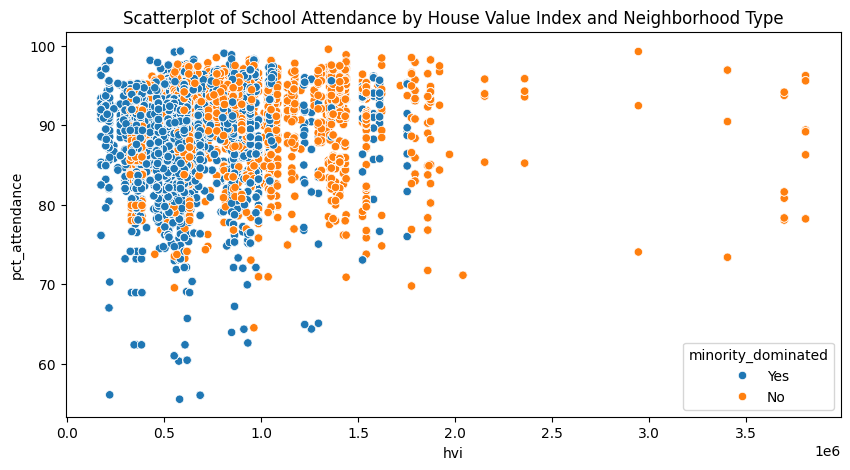

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='hvi', y='pct_attendance', hue='minority_dominated')
plt.title("Scatterplot of School Attendance by House Value Index and Neighborhood Type")
plt.show()


In [ ]:
model = smf.ols('pct_attendance ~ median_income + minority_dominated + hvi + num_evictions', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         pct_attendance   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     225.8
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.21e-192
Time:                        12:02:04   Log-Likelihood:            -1.0981e+05
No. Observations:               35936   AIC:                         2.196e+05
Df Residuals:                   35931   BIC:                         2.197e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

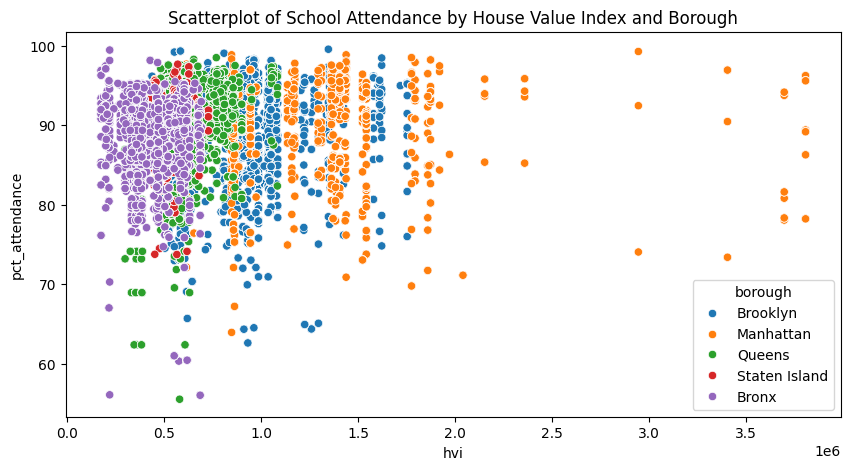

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='hvi', y='pct_attendance', hue='borough')
plt.title("Scatterplot of School Attendance by House Value Index and Borough")
plt.show()

In [ ]:
model = smf.ols('pct_attendance ~ median_income + minority_dominated + hvi + num_evictions + C(borough)', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         pct_attendance   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     259.8
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:03:43   Log-Likelihood:            -1.0924e+05
No. Observations:               35936   AIC:                         2.185e+05
Df Residuals:                   35927   BIC:                         2.186e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

The multivariate analysis shows a significant negative association between school attendance rate and median income within the neighborhood. A $10,000 increase in median income is associated with 0.14% increase in the school attendance rate, ceteris paribus. The correlation is still robustly significant after controlling different boroughs. It is a pretty interesting result as it suggests that the higher income neighborhoods tend to have lower school attendance rates. However, the relationship may suffer from omitted variable bias and the coefficient is rather small.